In [3]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.patches as mpatches
from shapely.ops import nearest_points

# INEGI Shapefiles

## Leer los Shapefiles usando GeoPandas

In [4]:
# Cargando datos de las escuelas
escuelas = gpd.read_file('Escuelas/conjunto_de_datos/denue_inegi_61_.shp')
escuelas.head(5)

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,8362275,02004611611001791000000000U8,ACADEMIA DE DANZA DAENSEU,None,611611,Escuelas de arte del sector privado,0 a 5 personas,AVENIDA,ARANJUEZ,AVENIDA,...,5940,018,None,ACADEMIADEDANZADAENSEU@GMAIL.COM,None,Fijo,32.504878,-116.866163,2019-11,POINT (-116.86616 32.50488)
1,117215,02004611611000961000000000U8,ACADEMIA DE DANZA KULIMA,None,611611,Escuelas de arte del sector privado,0 a 5 personas,CALLE,CASTILLO DE CHAPULTEPEC,CALLE,...,3287,044,6643810100,KUILIMAACADEMIA@HOTMAIL.COM,None,Fijo,32.530170,-116.986028,2014-12,POINT (-116.98603 32.53017)
2,6908025,02001611611000701000000000U4,ACADEMIA DE DANZA CONGAS CHIC,None,611611,Escuelas de arte del sector privado,0 a 5 personas,AVENIDA,PRIMER AYUNTAMIENTO,CALLE,...,7875,018,None,SANDRADELGADO286@GMAIL.COM,None,Fijo,31.861220,-116.590644,2019-11,POINT (-116.59064 31.86122)
3,126361,02004611611000802000000000U4,ACADEMIA DE DANZA COPELIA,None,611611,Escuelas de arte del sector privado,6 a 10 personas,CALLE,D,CALLE,...,4069,015,6646229426,INFOCOPELIATIJ@GMAIL.COM,None,Fijo,32.482036,-116.941097,2014-12,POINT (-116.94110 32.48204)
4,7368721,02004611611001701000000000U7,ACADEMIA DE DANZA VILLA DI DANZA,None,611611,Escuelas de arte del sector privado,0 a 5 personas,CALLE,MONTES DE OCA,CALLE,...,5851,005,6643751622,None,None,Fijo,32.506026,-116.865755,2019-11,POINT (-116.86576 32.50603)


In [5]:
type(escuelas)

geopandas.geodataframe.GeoDataFrame

In [6]:
escuelas.columns

Index(['id', 'clee', 'nom_estab', 'raz_social', 'codigo_act', 'nombre_act',
       'per_ocu', 'tipo_vial', 'nom_vial', 'tipo_v_e_1', 'nom_v_e_1',
       'tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 'nom_v_e_3', 'numero_ext',
       'letra_ext', 'edificio', 'edificio_e', 'numero_int', 'letra_int',
       'tipo_asent', 'nomb_asent', 'tipoCenCom', 'nom_CenCom', 'num_local',
       'cod_postal', 'cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ageb', 'manzana', 'telefono', 'correoelec', 'www',
       'tipoUniEco', 'latitud', 'longitud', 'fecha_alta', 'geometry'],
      dtype='object')

In [7]:
escuelas.geom_type

0         Point
1         Point
2         Point
3         Point
4         Point
          ...  
148545    Point
148546    Point
148547    Point
148548    Point
148549    Point
Length: 148550, dtype: object

In [8]:
#Cargando datos de los estados 
estados = gpd.read_file('Estados/conjunto_de_datos')
estados.tail(5)

,CVEGEO,CVE_ENT,NOMGEO,geometry
27,28,28,Tamaulipas,"POLYGON ((2724530.125 1735179.945, 2724595.848..."
28,29,29,Tlaxcala,"POLYGON ((2912153.553 863641.586, 2912195.798 ..."
29,30,30,Veracruz de Ignacio de la Llave,"MULTIPOLYGON (((3119599.686 810246.093, 311958..."
30,31,31,Yucatán,"MULTIPOLYGON (((3511760.832 1023282.324, 35117..."
31,32,32,Zacatecas,"POLYGON ((2515182.307 1441549.749, 2515937.734..."


In [9]:
estados.columns

Index(['CVEGEO', 'CVE_ENT', 'NOMGEO', 'geometry'], dtype='object')

In [10]:
estados.geom_type

0          Polygon
1     MultiPolygon
2     MultiPolygon
3     MultiPolygon
4          Polygon
5     MultiPolygon
6          Polygon
7          Polygon
8          Polygon
9          Polygon
10         Polygon
11    MultiPolygon
12         Polygon
13    MultiPolygon
14         Polygon
15         Polygon
16         Polygon
17    MultiPolygon
18         Polygon
19    MultiPolygon
20         Polygon
21         Polygon
22    MultiPolygon
23         Polygon
24    MultiPolygon
25    MultiPolygon
26         Polygon
27         Polygon
28         Polygon
29    MultiPolygon
30    MultiPolygon
31         Polygon
dtype: object

## Comandos Básicos

<Axes: >

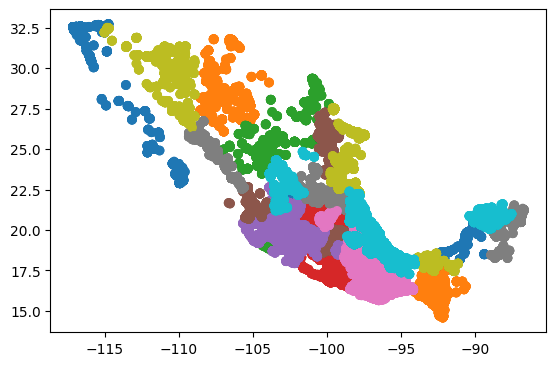

In [11]:
# Graficar escuelas por estado
escuelas.plot(column = "entidad")

In [12]:
escuelas= escuelas.set_index("id")
escuelas.head(5)

,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
id,,,,,,,,,,,,,,,,,,,,,
8362275,02004611611001791000000000U8,ACADEMIA DE DANZA DAENSEU,None,611611,Escuelas de arte del sector privado,0 a 5 personas,AVENIDA,ARANJUEZ,AVENIDA,AVENIDA DE LAS AGUAS,...,5940,018,None,ACADEMIADEDANZADAENSEU@GMAIL.COM,None,Fijo,32.504878,-116.866163,2019-11,POINT (-116.86616 32.50488)
117215,02004611611000961000000000U8,ACADEMIA DE DANZA KULIMA,None,611611,Escuelas de arte del sector privado,0 a 5 personas,CALLE,CASTILLO DE CHAPULTEPEC,CALLE,GENERAL ANAYA,...,3287,044,6643810100,KUILIMAACADEMIA@HOTMAIL.COM,None,Fijo,32.530170,-116.986028,2014-12,POINT (-116.98603 32.53017)
6908025,02001611611000701000000000U4,ACADEMIA DE DANZA CONGAS CHIC,None,611611,Escuelas de arte del sector privado,0 a 5 personas,AVENIDA,PRIMER AYUNTAMIENTO,CALLE,SEGUNDA,...,7875,018,None,SANDRADELGADO286@GMAIL.COM,None,Fijo,31.861220,-116.590644,2019-11,POINT (-116.59064 31.86122)
126361,02004611611000802000000000U4,ACADEMIA DE DANZA COPELIA,None,611611,Escuelas de arte del sector privado,6 a 10 personas,CALLE,D,CALLE,ATOYAC,...,4069,015,6646229426,INFOCOPELIATIJ@GMAIL.COM,None,Fijo,32.482036,-116.941097,2014-12,POINT (-116.94110 32.48204)
7368721,02004611611001701000000000U7,ACADEMIA DE DANZA VILLA DI DANZA,None,611611,Escuelas de arte del sector privado,0 a 5 personas,CALLE,MONTES DE OCA,CALLE,CONDOMINIO II,...,5851,005,6643751622,None,None,Fijo,32.506026,-116.865755,2019-11,POINT (-116.86576 32.50603)


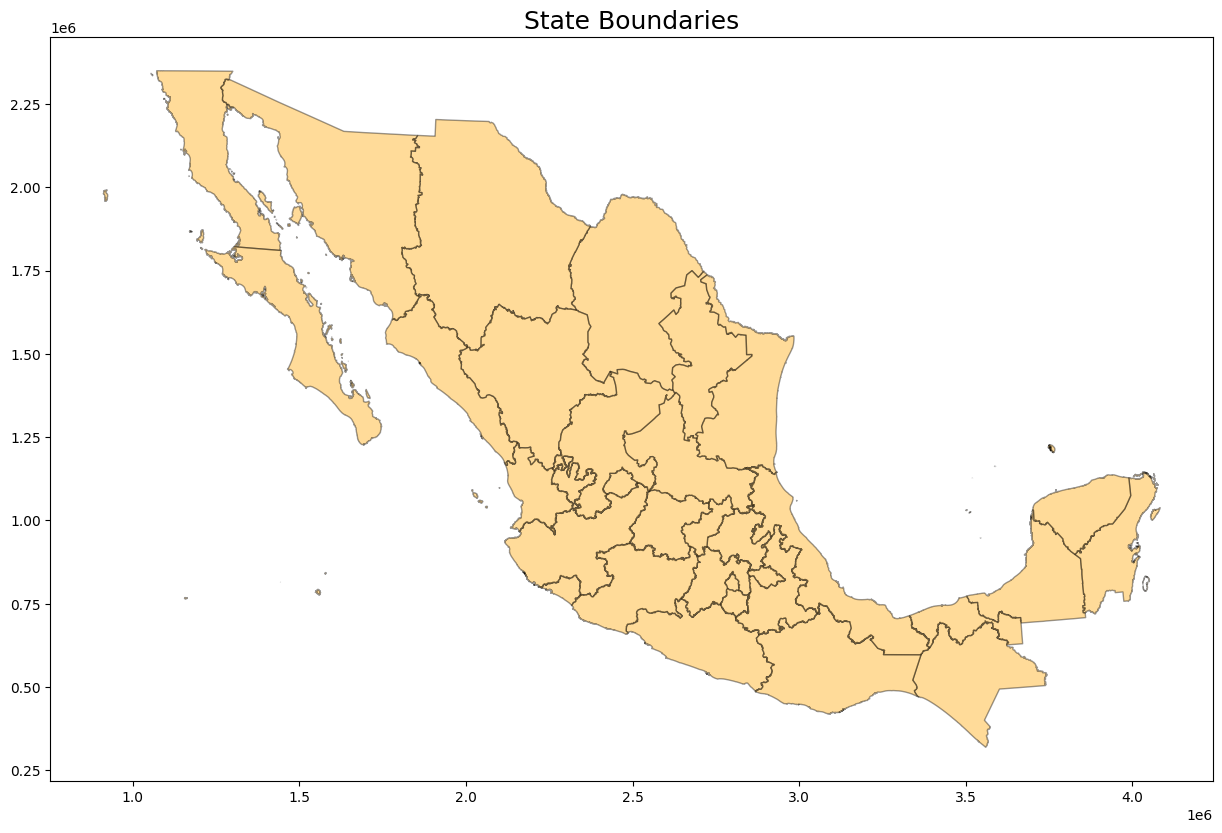

In [13]:
# Mapa de México por estados
fig, ax = plt.subplots(figsize=(15, 10))
estados.plot(ax=ax, color='orange', edgecolor='black', alpha=0.4)
ax.set_title("State Boundaries", fontsize=18)
plt.show()

In [14]:
# Seleccionar una columna
escuelas["latitud"]

id
8362275    32.504878
117215     32.530170
6908025    31.861220
126361     32.482036
7368721    32.506026
             ...    
4591447    21.001661
4593523    21.019215
4458660    18.144051
4524728    20.990704
4496460    20.933630
Name: latitud, Length: 148550, dtype: float64

## Métodos Geográficos

In [15]:
# Encontrar el área de los estados
estados["area"] = estados.area / 10**6
estados.head(5)

,CVEGEO,CVE_ENT,NOMGEO,geometry,area
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",5558.673843
1,02,02,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135...",73412.197393
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",72773.977048
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",57269.828738
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",150671.222987


In [16]:
#Podemos mostrar dos columnas 
estados[['NOMGEO','area']]

,NOMGEO,area
0,Aguascalientes,5558.673843
1,Baja California,73412.197393
2,Baja California Sur,72773.977048
3,Campeche,57269.828738
4,Coahuila de Zaragoza,150671.222987
5,Colima,5754.122700
6,Chiapas,73617.359029
7,Chihuahua,246973.359985
8,Ciudad de México,1486.183216
9,Durango,122131.204868


<Axes: >

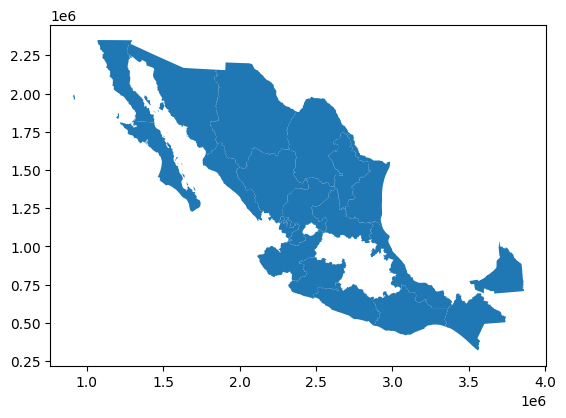

In [17]:
# Graficar solo los estados con área mayor a 50,000 (km cuadrados)
estados_grandes = estados[estados['area'] > 50000]
estados_grandes.plot()

In [18]:
# Encontrar el perímetro de los estados
estados["perimetro"] = estados.boundary
estados.head(5)

,CVEGEO,CVE_ENT,NOMGEO,geometry,area,perimetro
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",5558.673843,"LINESTRING (2470517.824 1155028.588, 2470552.2..."
1,02,02,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135...",73412.197393,"MULTILINESTRING ((1313480.513 1831458.607, 131..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",72773.977048,"MULTILINESTRING ((1694656.344 1227647.637, 169..."
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",57269.828738,"MULTILINESTRING ((3544897.199 946994.621, 3544..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",150671.222987,"LINESTRING (2469954.193 1978522.993, 2469982.8..."


<Axes: >

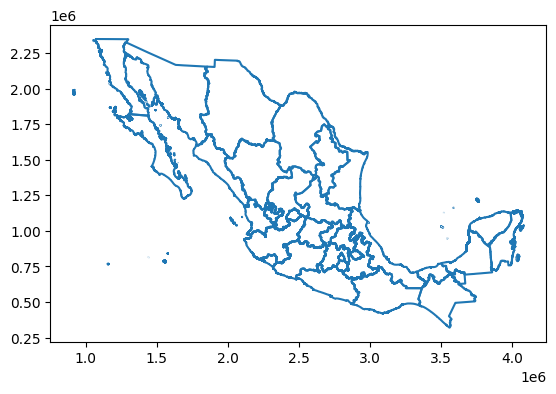

In [19]:
#Graficar las fronteras entre estados
estados.boundary.plot()

In [20]:
# Encontrar el perímetro de los estados
estados["perimetro"] = estados.boundary.length / 1000
estados.head(5)

,CVEGEO,CVE_ENT,NOMGEO,geometry,area,perimetro
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",5558.673843,423.005983
1,02,02,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135...",73412.197393,3114.717966
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",72773.977048,4086.628211
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",57269.828738,1566.405110
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",150671.222987,2414.885296


In [21]:
# Guardar el centroide de cada estado
estados["centroide"] = estados.centroid
estados.head(5)

,CVEGEO,CVE_ENT,NOMGEO,geometry,area,perimetro,centroide
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248...",5558.673843,423.005983,POINT (2462808.983 1109866.277)
1,02,02,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135...",73412.197393,3114.717966,POINT (1243763.617 2110260.341)
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",72773.977048,4086.628211,POINT (1501178.182 1572567.869)
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",57269.828738,1566.405110,POINT (3722580.440 810059.531)
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807...",150671.222987,2414.885296,POINT (2495627.136 1691945.042)


In [22]:
# Encontrar la distancia de CDMX a Nuevo León
centroide_CDMX = estados[estados["NOMGEO"] == 'Ciudad de México']['centroide'].reset_index(drop=True)
centroide_NL = estados[estados["NOMGEO"] == 'Nuevo León']['centroide'].reset_index(drop=True)
distancia = centroide_CDMX.distance(centroide_NL)/1000
print(distancia)


0    698.355349
dtype: float64


In [23]:
# Encontrar la distancia de CDMX a Nuevo León
centroide_CDMX = estados[estados["NOMGEO"] == 'Ciudad de México']['centroide'].iloc[0]
centroide_NL = estados[estados["NOMGEO"] == 'Nuevo León']['centroide'].iloc[0]
distancia = centroide_CDMX.distance(centroide_NL)/1000
print(distancia)


698.3553486149492


## Algunos métodos más elaborados

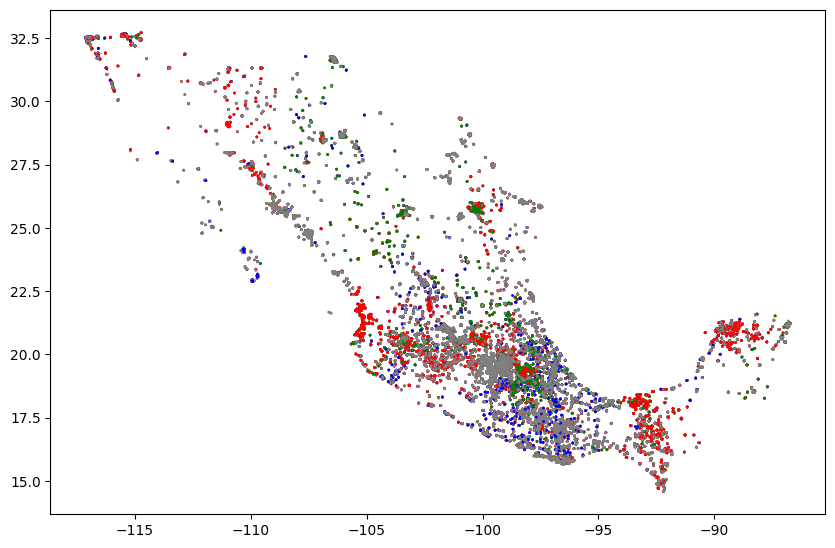

In [24]:
# Definimos los regex que vamos a usar
regex_primaria = r"(?i)(primaria|escuela básica|escuela elemental)"
regex_secundaria = r"(?i)(secundaria|escuela media|educación media)"
regex_prep_bach = r"(?i)(preparatoria|bachillerato|prepa|colegio)"

# Función que determina el color dependiendo de el regex 
def assign_color(row):
    if pd.notna(row['nom_estab']):
        if re.search(regex_prep_bach, row['nom_estab']):
            return 'blue'  # Color for Prepa
        elif re.search(regex_secundaria, row['nom_estab']):
            return 'green'  # Color for Secundaria
        elif re.search(regex_primaria, row['nom_estab']):
            return 'red'  # Color for Primaria
    return 'gray'  # Color if none match

# Aplicamos la función
escuelas['color'] = escuelas.apply(assign_color, axis=1)

# Graficamos
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
escuelas.plot(ax=ax, color=escuelas['color'], markersize=1)  # Adjust markersize as needed
plt.show()

## CRS y Buffers

In [25]:
escuelas.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [26]:
# Cambiamos el CRS
escuelas_utm = escuelas.to_crs(epsg=6362)  # EPSG 6362 es el de méxico

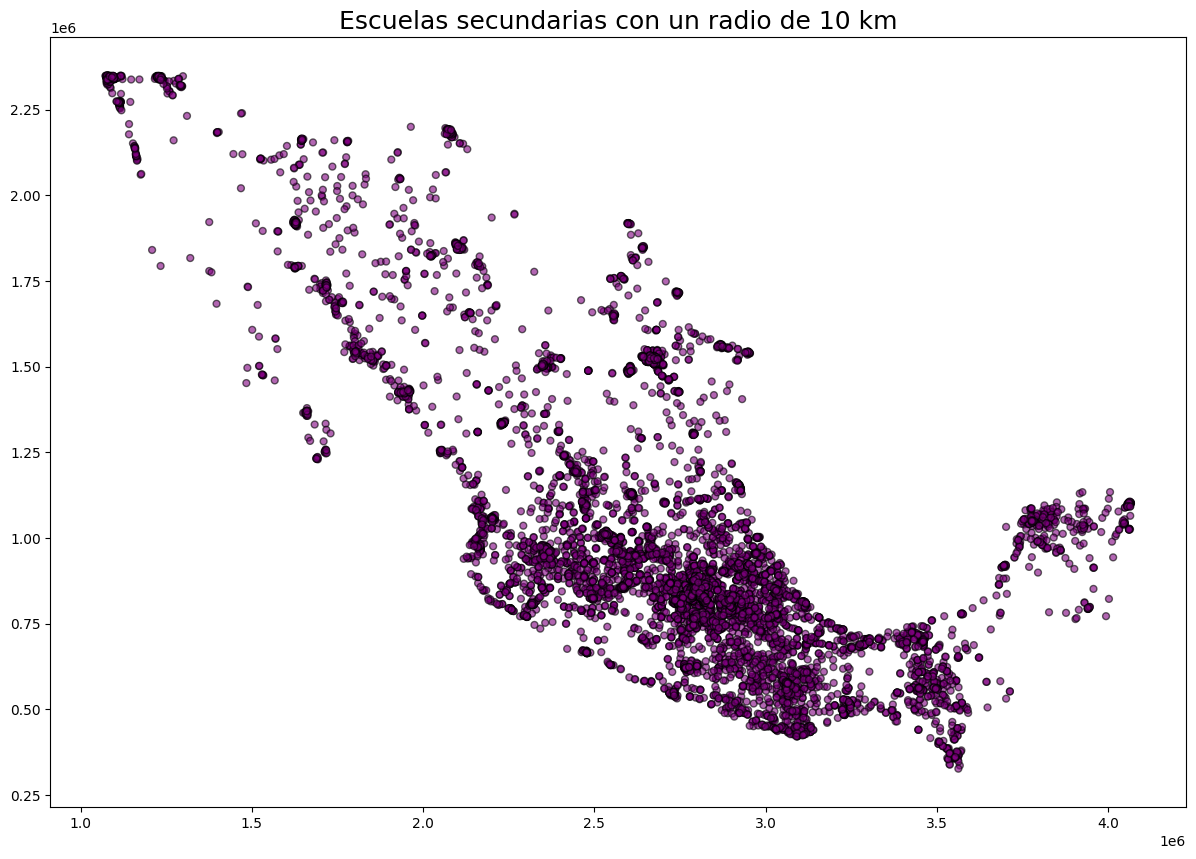

In [27]:
# Hacemos un buffer de 10 km de las escuelas
escuelas_buffer = escuelas_utm[escuelas_utm['color'] == 'green'].buffer(10000) 
# Graficamos
fig, ax = plt.subplots(figsize=(15, 10))
escuelas_buffer.plot(ax=ax, color='purple', edgecolor='black', alpha=0.6)
ax.set_title("Escuelas secundarias con un radio de 10 km", fontsize=18)
plt.show()

## SJOIN

In [29]:
escuelas_in_ent = gpd.sjoin(escuelas, estados, how='inner', predicate='within')

/tmp/ipykernel_20/1828845042.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...
Right CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["GCS_MEXICO_I ...

  escuelas_in_ent = gpd.sjoin(escuelas, estados, how='inner', predicate='within')


¿Por qué falla?
Porque los shapefiles tienen distintos "Coordinate Reference System" (CRS) que definen cómo se debe proyectar la información geográfica sobre un superficie 2D.

In [30]:
print(estados.crs)
print("\n",escuelas.crs)

PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["GCS_MEXICO_ITRF_2008",DATUM["International_Terrestrial_Reference_Frame_2008",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1061"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]

 GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


Podemos checar el CRS que utiliza cada shapefile de esta forma:

In [31]:
# Vamos a definir el CRS al que vamos a cambiar
mexico_crs = "EPSG:6362"

# Cambiamos el CRS al de méxico
escuelas = escuelas.to_crs(mexico_crs)
estados = estados.to_crs(mexico_crs)

escuelas_in_ent = gpd.sjoin(escuelas, estados, how='inner', predicate='within')

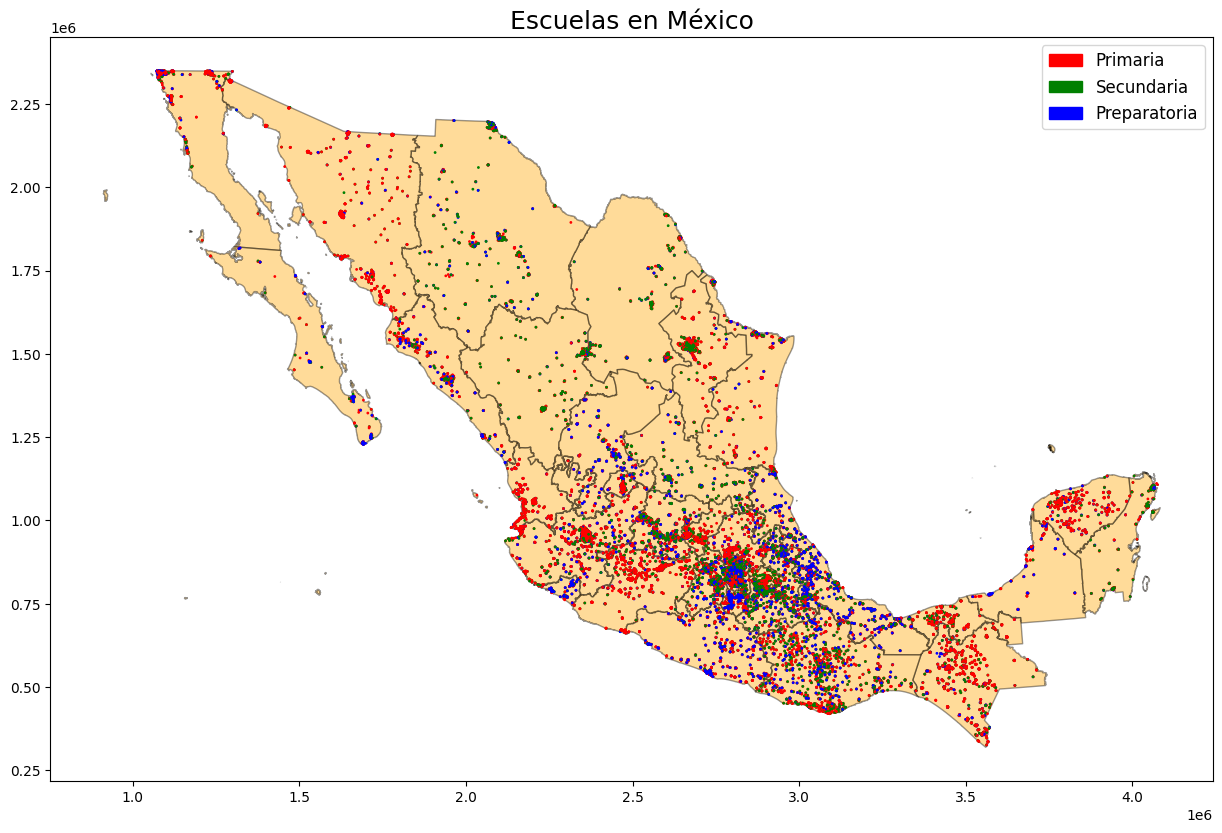

In [32]:
# Define the regex patterns
regex_primaria = r"(?i)(primaria|escuela básica|escuela elemental)"
regex_secundaria = r"(?i)(secundaria|escuela media|educación media)"
regex_prep_bach = r"(?i)(preparatoria|bachillerato|prepa|colegio)"

# Function to determine color based on regex matching
def assign_color(row):
    if pd.notna(row['nom_estab']):
        if re.search(regex_prep_bach, row['nom_estab']):
            return 'blue'  # Color for Prepa
        elif re.search(regex_secundaria, row['nom_estab']):
            return 'green'  # Color for Secundaria
        elif re.search(regex_primaria, row['nom_estab']):
            return 'red'  # Color for Primaria
    return 'gray'  # Color if none match

# Apply the function to each row
escuelas_in_ent['color'] = escuelas_in_ent.apply(assign_color, axis=1)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
estados.plot(ax=ax, color='orange', edgecolor='black', alpha=0.4)
escuelas_sin_gris = escuelas_in_ent[escuelas_in_ent['color']!='gray']
escuelas_sin_gris.plot(ax=ax, color=escuelas_sin_gris['color'], markersize=1, legend=True)

legend_patches = [
    mpatches.Patch(color='red', label='Primaria'),
    mpatches.Patch(color='green', label='Secundaria'),
    mpatches.Patch(color='blue', label='Preparatoria'),
]
ax.set_aspect('equal')
ax.legend(handles=legend_patches, loc='upper right', fontsize=12)
ax.set_title("Escuelas en México", fontsize=18)
plt.show()

In [34]:
escuelas_cdmx = gpd.overlay(estados[estados['NOMGEO']=='Ciudad de México'], escuelas_buffer, how = 'intersection')

NotImplementedError: overlay currently only implemented for GeoDataFrames

¿Por qué falla?

Porque nuestras escuelas_buffer son una serie

In [35]:
#Lo convertimos a DataFrame
escuelas_buffer_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(escuelas_buffer), crs=escuelas.crs)
escuelas_cdmx = gpd.overlay(estados[estados['NOMGEO']=='Ciudad de México'], escuelas_buffer_gdf, how = 'intersection')

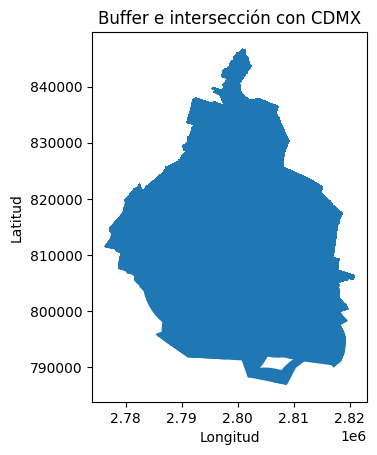

In [36]:
#Graficamos
escuelas_cdmx.plot()

plt.title('Buffer e intersección con CDMX')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [39]:
escuelas_buffer_gdf.to_file("escuelas_buffer.shp")

In [45]:
escuelas_buffer_gdf.columns


Index(['geometry'], dtype='object')

In [53]:
escuelas_buffer_gdf = escuelas_buffer_gdf.to_crs(epsg=32614)
unify_buffer = escuelas_buffer_gdf.unary_union
total_area = unify_buffer.area
total_areaP = estados['area'].sum() * 10**6
print(f"Total area of buffers: {total_area} square meters")
prop = total_area/total_areaP
print(prop)

Total area of buffers: 629537568637.4564 square meters
0.3220668626640353


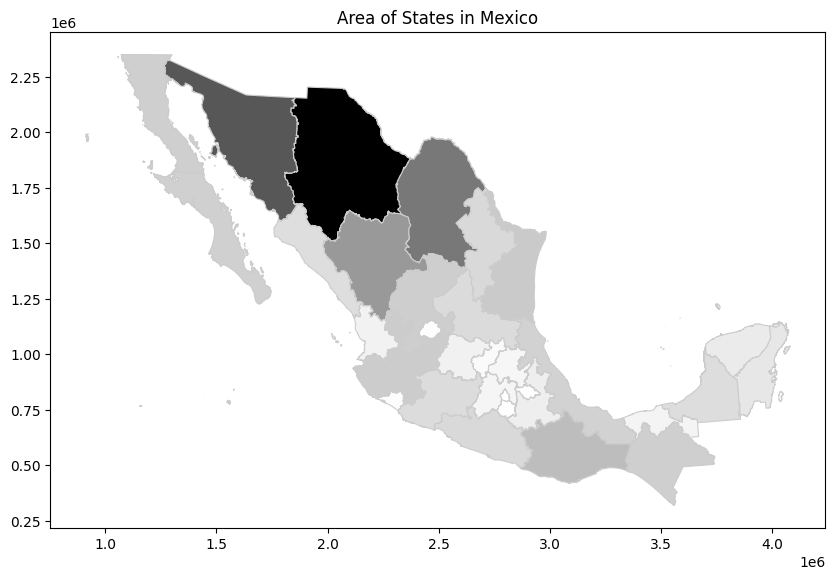

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
estados.plot(column='area', cmap='Greys', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Area of States in Mexico')
plt.show()